In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 31.3 MB/s eta 0:00:00


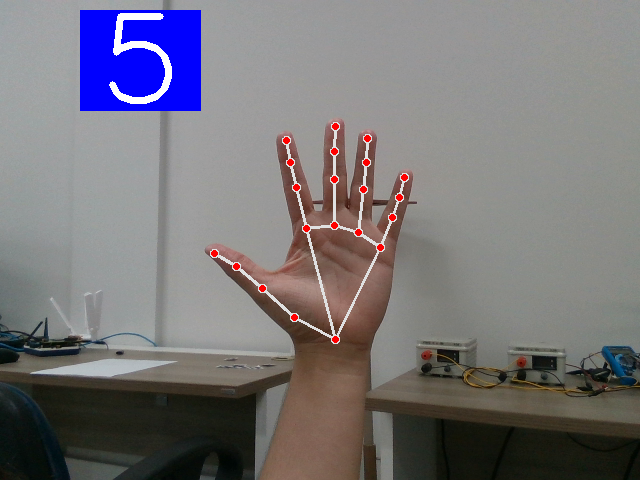

In [22]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

# Carrega a imagem
img = cv2.imread("imagem_5.png")

mpHands = mp.solutions.hands #cria um objeto do media pipe com as marcações da mão
hands =mpHands.Hands() 
mpDraw = mp.solutions.drawing_utils 

# Faz o processamento das informações do objeto tipo mão
imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
resultado = hands.process(imgRGB) 

# Leitura dos resultados do processamento
handPoints = resultado.multi_hand_landmarks  
h,w,_ = img.shape 
pontos = []

if resultado.multi_hand_landmarks:
    for handsLms in resultado.multi_hand_landmarks:
        mpDraw.draw_landmarks(img, handsLms, mpHands.HAND_CONNECTIONS) 
        # Desenha os pontos da mão e as conexões entre eles 
        for id,cord in enumerate(handsLms.landmark): 
            # Enumera as marcações da mão e obtem e armazena as coordenadas de cada uma dentro de um vetor
            cx,cy = int(cord.x * w),int(cord.y * h)
            pontos.append((cx,cy))

        dedos = [8,12,16,20]
        cont = 0
        if pontos: 
            # Lê qual número está mostrado na mão a partir dos "intervalos dos dedos" mostrados nas marcações
            if pontos[4][0] < pontos[3][0]:
                cont += 1
            for x in dedos:
               if pontos[x][1] < pontos[x-2][1]:
                   cont +=1

        cv2.rectangle(img, (80, 10), (200,110), (255, 0, 0), -1) #mostrando número lido na tela
        cv2.putText(img,str(cont),(100,100),cv2.FONT_HERSHEY_SIMPLEX,4,(255,255,255),5) 

cv2_imshow(img)
cv2.waitKey(0) # Espera que uma tecla seja pressionada
cv2.destroyAllWindows() # Fecha todas as janelas